# Прогноз необходимого числа набюдений эксперимента

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# TODO: Определить необходимое число наблюдений 
#       в эксперименте для получения значимого результата:
# Среднее значение: 100
# STD: 10
# Минимальный уровень изменений: +3% 100 -> 103 -> diff=3
# Уровень значимости: 95%

In [3]:
# z = diff / SE -> ppf(0.95)
# SE = STD / np.sqrt(n)
# n = (STD / SE) ** 2

In [4]:
STD = 10
DIFF = 3
Q = 0.95

In [5]:
z = st.norm.ppf(Q)

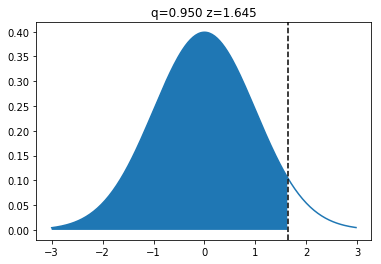

In [6]:
# Визуализируем z-распределение
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x), where=x<z)
plt.title('q=%.3f z=%.3f' % (Q, z));

In [7]:
# число наблюдений для достижения необходимого уровня значимости
n = (STD / (DIFF / z))**2 

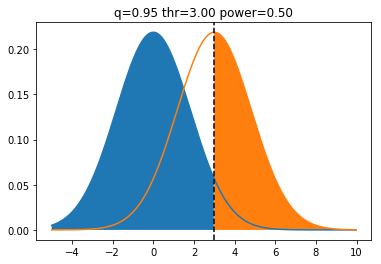

In [8]:
# оценим мощность критерия

# n = 90  # изменяя n, влияем на мощность критерия

se = STD / np.sqrt(n)
thr = st.norm.ppf(Q, 0, se)

betta = st.norm.cdf(thr, DIFF, se)
power = 1 - betta  # доля верно отклоненных нулевых гипотез

x = np.arange(-5, 10, 0.025)
plt.plot(x, st.norm.pdf(x, 0, se))
plt.plot(x, st.norm.pdf(x, DIFF, se))
plt.axvline(thr, color='k', linestyle='--')
plt.fill_between(x, st.norm.pdf(x, 0, se), where=x<thr)
plt.fill_between(x, st.norm.pdf(x, DIFF, se), where=x>thr)
plt.title('q=%.2f thr=%.2f power=%.2f' % (Q, thr, power));

In [9]:
# Симулируем эксперимент с подобранными параметрами
data = np.random.normal(103, STD, size=int(n))

In [10]:
SE = STD / np.sqrt(n)
z = (np.mean(data) - 100) / SE
q = st.norm.cdf(z)

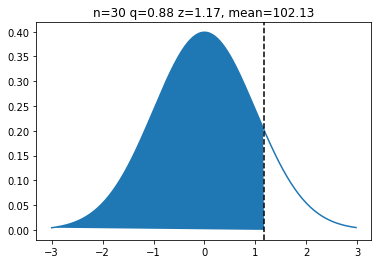

In [11]:
# Визуализируем z-распределение
x = np.arange(-3, 3, 0.025)
plt.plot(x, st.norm.pdf(x))
plt.axvline(z, color='k', linestyle='--')
plt.fill(np.hstack([x[x < z], [z]]),
         np.hstack([st.norm.pdf(x[x < z]), [0]]))
plt.title('n=%d q=%.2f z=%.2f, mean=%.2f' % (n, q, z, np.mean(data)));